In [1]:
using JLD2
using DataFrames
using StatProfilerHTML
using BenchmarkTools
using PrettyTables
using Plots
using Normalization
using Plots.PlotMeasures

using Revise

In [2]:
using MPSTime# Working Name

ERROR: LoadError: MPSTime [eb700b73-10a3-43ef-8a93-3d3908a35bf8] did not define the expected module `MPSTime`, check for typos in package module name
Stacktrace:
 [1] error(s::String)
   @ Base ./error.jl:35
 [2] check_package_module_loaded
   @ ./loading.jl:2805 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base ./loading.jl:2799
 [4] top-level scope
   @ stdin:5
in expression starting at stdin:5


ErrorException: Failed to precompile MPSTime [eb700b73-10a3-43ef-8a93-3d3908a35bf8] to "/home/noodles/.julia/compiled/v1.11/MPSTime/jl_jMoC3Y".

QuantumInspiredML

In [ ]:
b = MPSTime.stoudenmire()

Basis(Stoudenmire)

In [ ]:
b isa MPSTime.Encoding


true

In [ ]:
methods(MPSTime.SplitBasis)

# 1 method for type constructor:
 [1] QuantumInspiredML.SplitBasis(s::String, init::Function, spm::Function, aux_enc::QuantumInspiredML.Encoding, encode_func::Function, isc::Bool, istd::Bool, isdd::Bool, range::Tuple{Real, Real})
     @ ~/.julia/dev/QuantumInspiredML/src/Encodings/basis_structs.jl:30

In [7]:
uniform_split(:legendre_no_norm)

:Unif_Split_Legendre

# Load in some data

In [11]:
ipd_dloc = "../Data/italypower/datasets/ItalyPowerDemandOrig.jld2"


f = jldopen(ipd_dloc, "r")
    ipd_X_train = read(f, "X_train")
    ipd_y_train = read(f, "y_train")
    ipd_X_test = read(f, "X_test")
    ipd_y_test = read(f, "y_test")
close(f)

# Plot some different Basis options

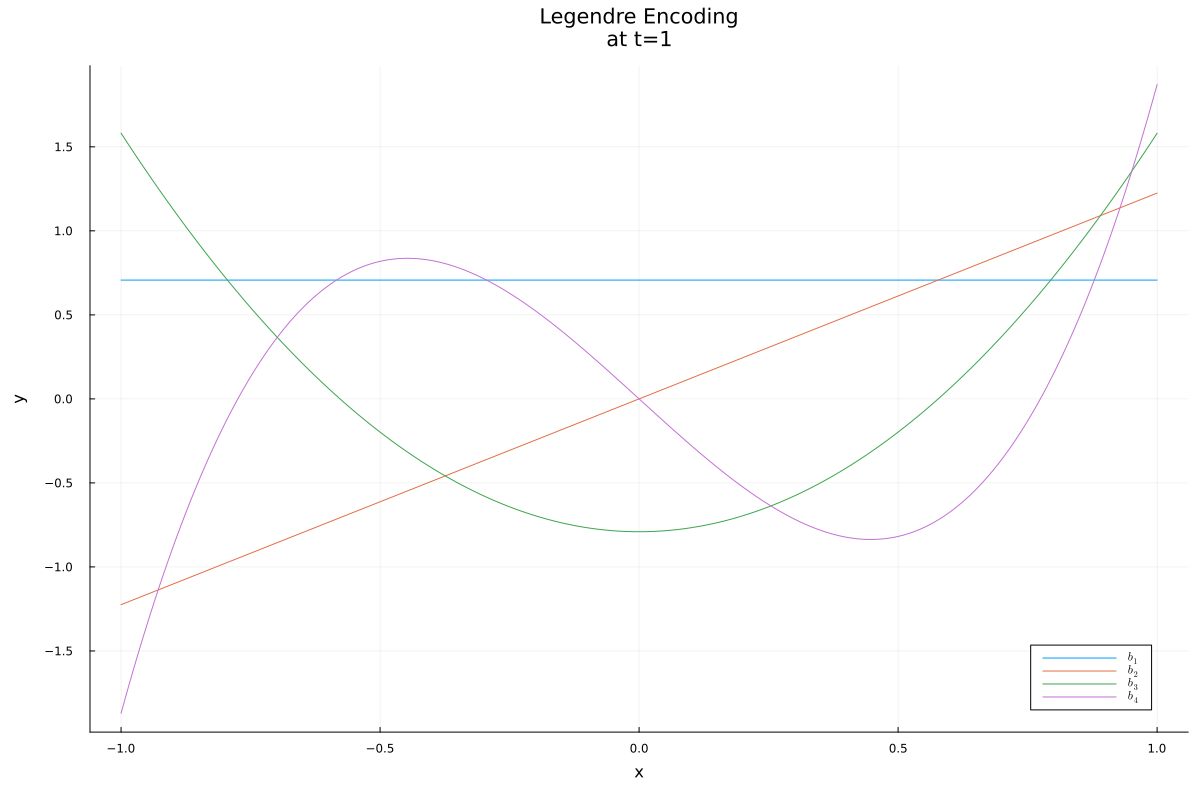

(Any[Number[0.7071067811865476 -1.224744871391589 1.5811388300841898 -1.8708286933869707; 0.7071067811865476 -1.219836074311863 1.5621652403223354 -1.8260639240153078; … ; 0.7071067811865476 1.219836074311863 1.5621652403223354 1.8260639240153078; 0.7071067811865476 1.224744871391589 1.5811388300841898 1.8708286933869707]], Any[Plot{Plots.GRBackend() n=4}])

In [12]:
basis, p = plot_encoding(:legendre, 4)


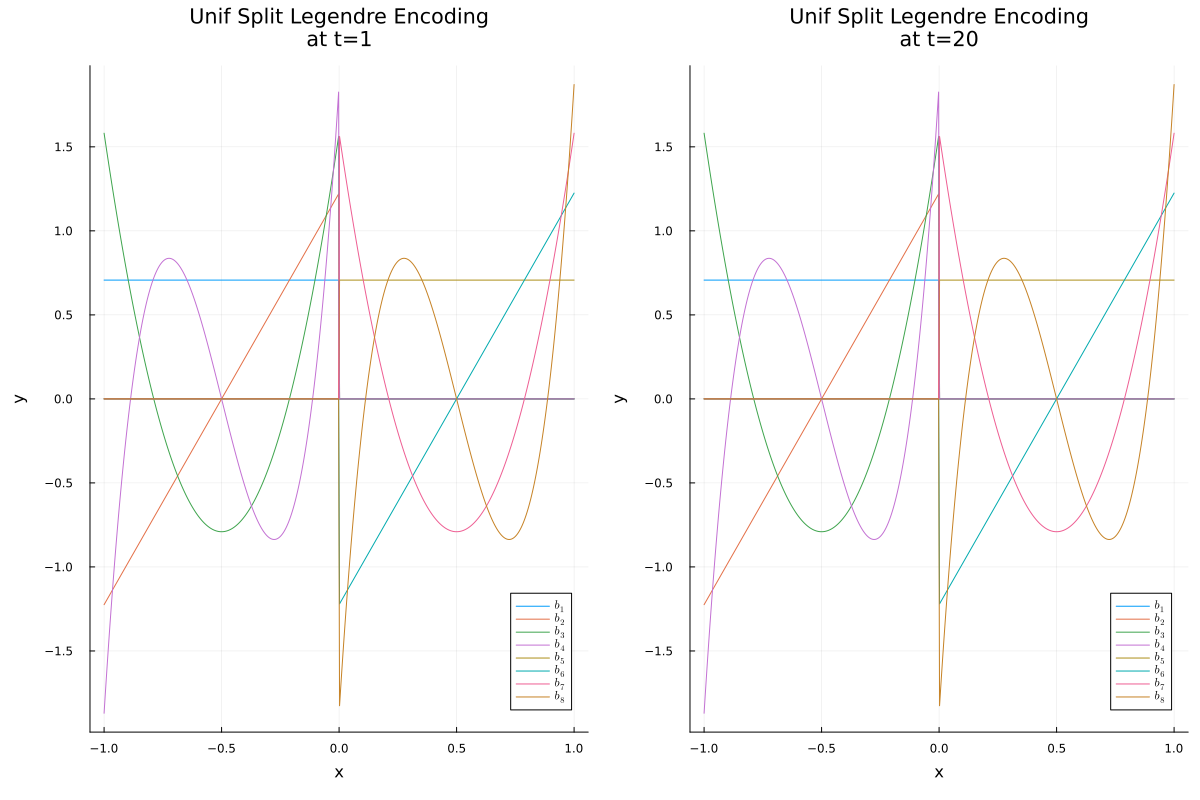

In [13]:
basis, p = plot_encoding(uniform_split(:legendre_no_norm), 8, ipd_X_train; tis=[1,20], aux_basis_dim=4);


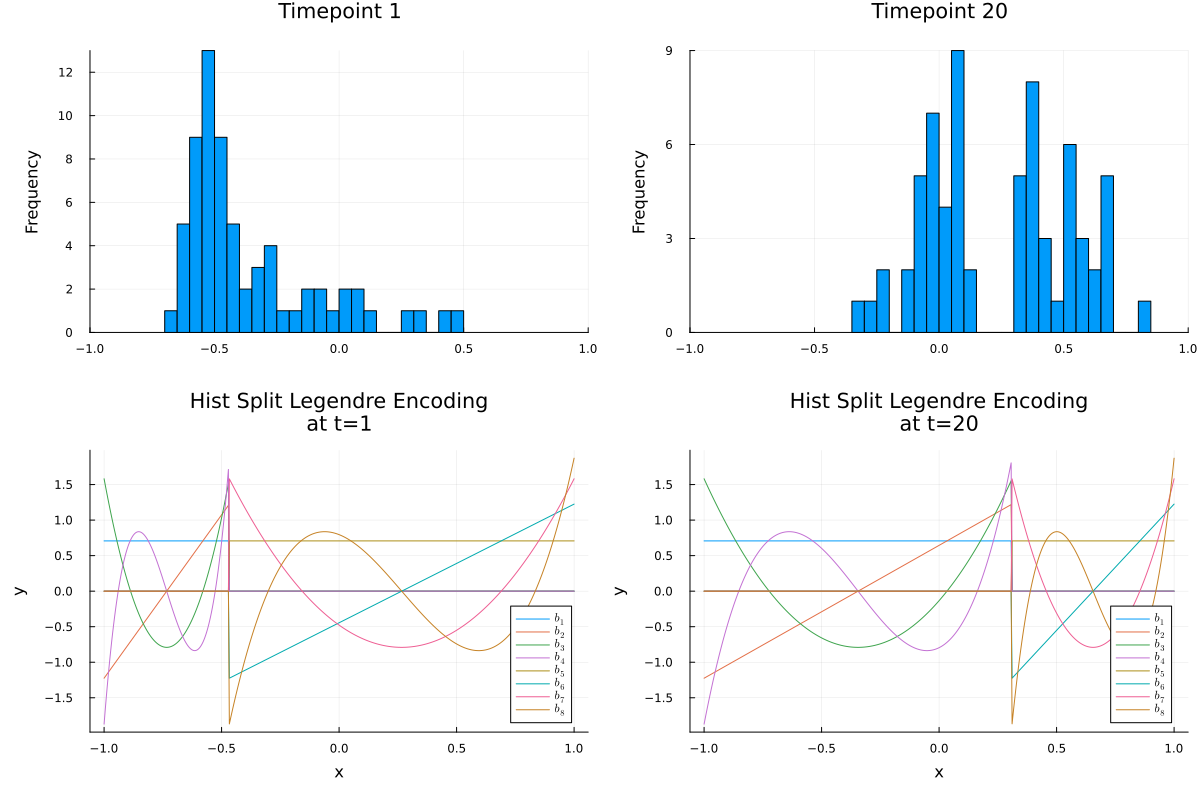

In [13]:
basis, p = plot_encoding(histogram_split(:legendre_no_norm), 8, ipd_X_train; tis=[1,20], aux_basis_dim=4);


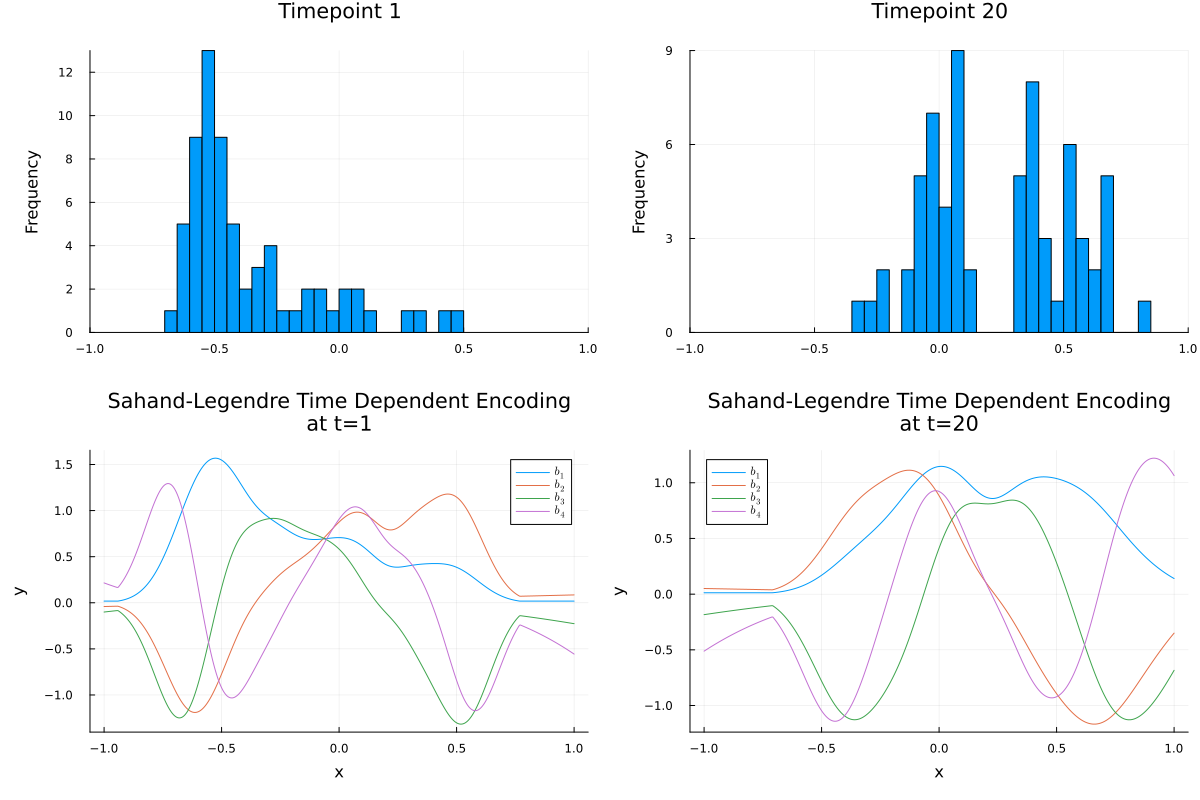

In [32]:
basis, p = plot_encoding(:sahand_legendre_time_dependent, 4, ipd_X_train; tis=[1,20]);


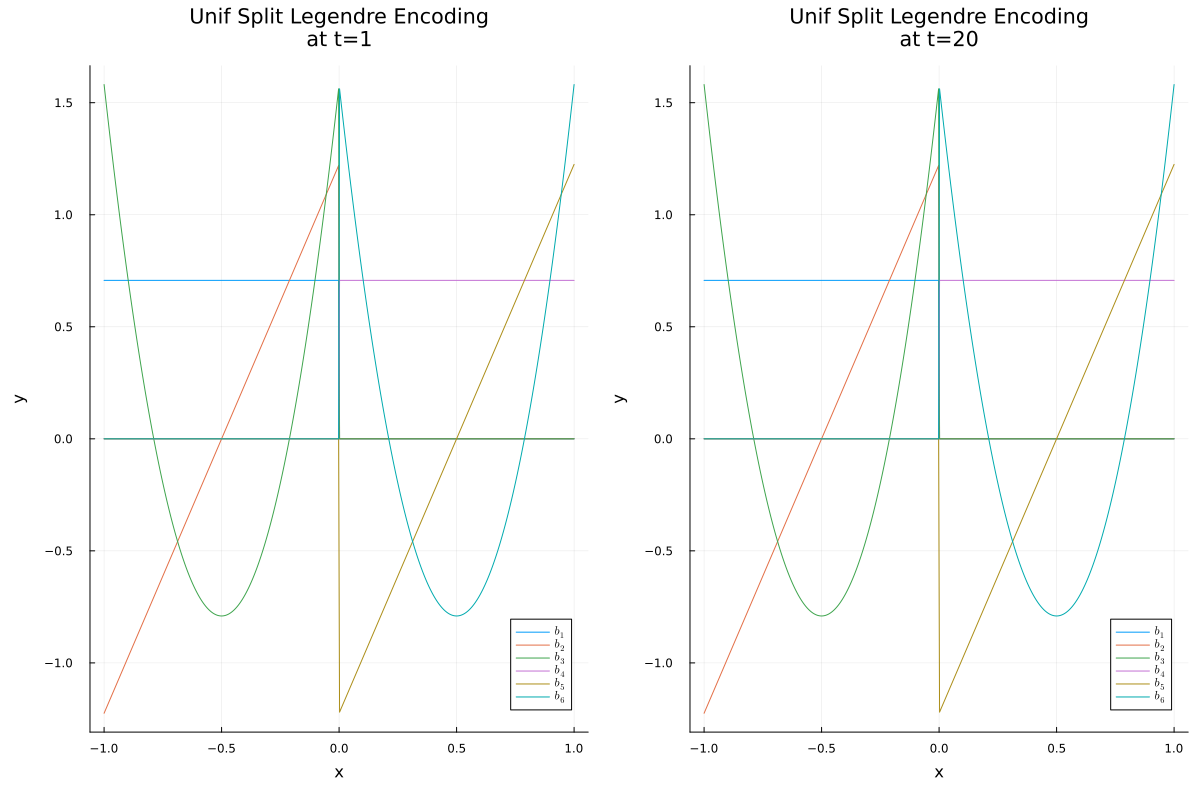

In [37]:
basis, p = plot_encoding(uniform_split(:Legendre), 6, ipd_X_train; tis=[1,20], aux_basis_dim=3);


Basis(Sahand-Legendre Time Independent)

# I don't know why you'd do this, but you can?

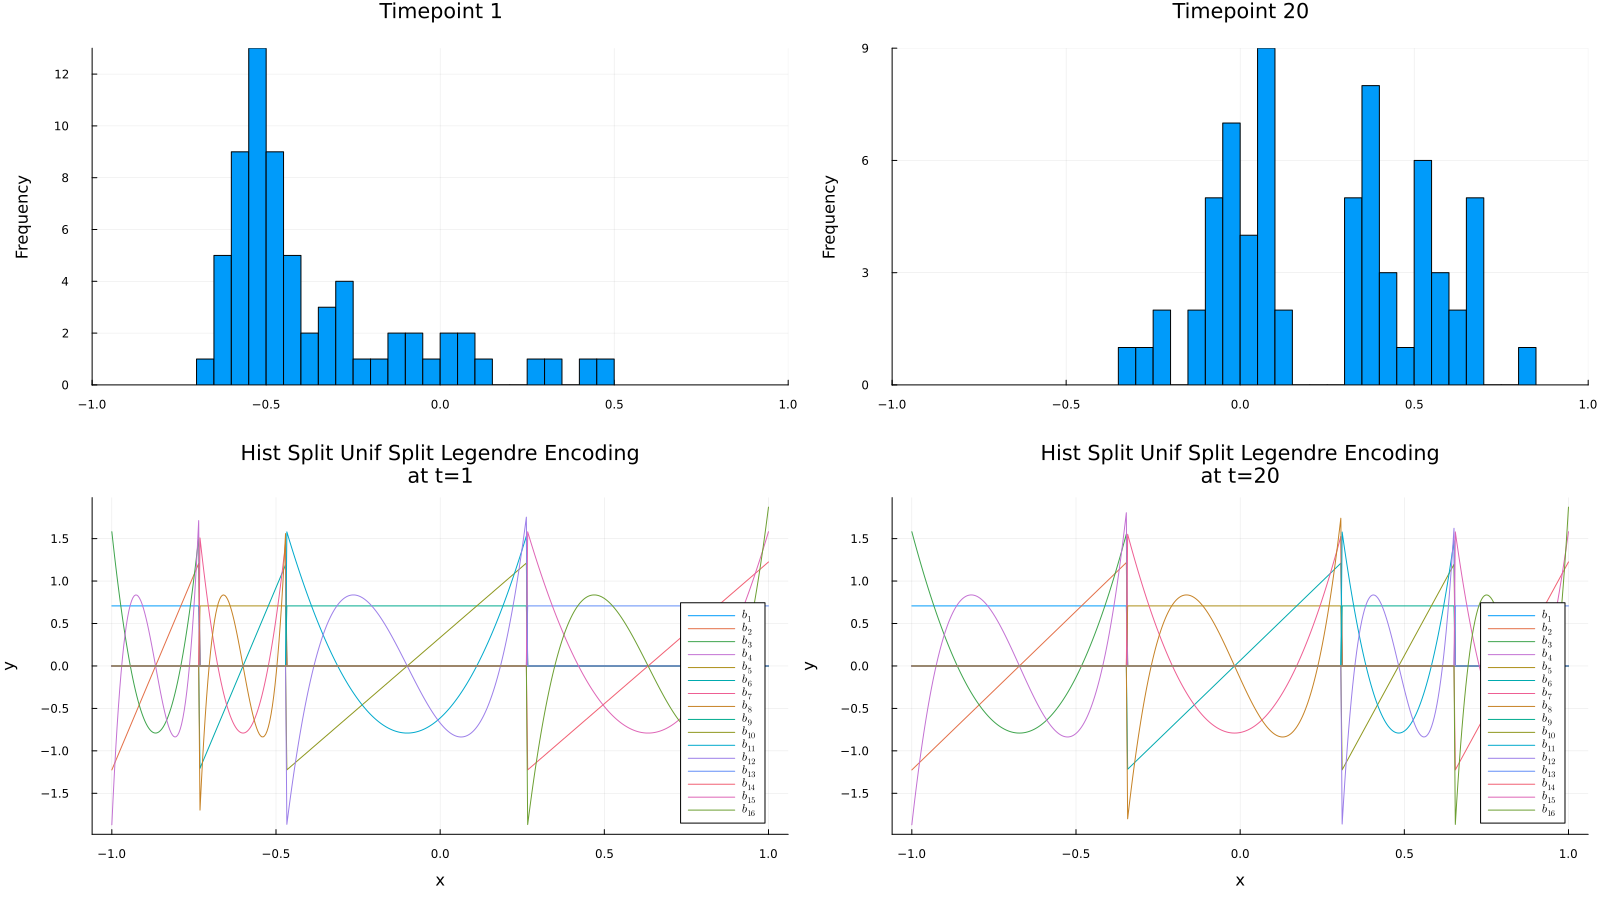

In [39]:
basis, p = plot_encoding(histogram_split(uniform_split(:legendre)), 16, ipd_X_train; tis=[1,20], aux_basis_dim=8, size=(1600,900));


true

In [6]:
sigmoid_transform, minmax = false, true
d =5 
data_bounds= (0,1.)

(0, 1.0)

In [ ]:
opts = MPSTime.Options(; encoding=legendre(), minmax=true, d=d, sigmoid_transform=false, data_bounds=data_bounds)
X_norm, _... = MPSTime.transform_train_data(permutedims(ipd_X_train); opts)
encoding_args = opts.encoding.init(X_norm, ipd_y_train; opts=opts)

Any[]

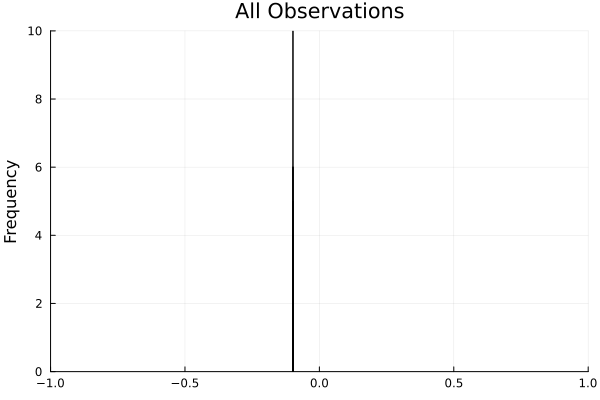

In [ ]:
if opts.encoding.istimedependent
    h = histogram(X_norm[1,:]; bins=25, title="Timepoint 1",ylabel="Frequency", legend=:none, xlims=opts.encoding.range)
else
    h = histogram(mean(X_norm; dims=1)[:]; bins=25, title="Average of All Observations",ylabel="Frequency", legend=:none, xlims=opts.encoding.range)
end

In [10]:
mean(X_norm; dims=1)

1×67 Matrix{Float64}:
 -0.0982499  -0.0982499  -0.0982499  …  -0.0982499  -0.0982499  -0.0982499

In [12]:
X_train_scaled = permutedims(ipd_X_train)
minmax = Normalization.fit(MinMax, X_train_scaled)
normalize!(X_train_scaled, minmax)

24×67 Matrix{Float64}:
 0.289973   0.226      0.749588  0.266891  …  0.188376   0.293505  0.673717
 0.182903   0.127768   0.579905  0.188738     0.156163   0.171012  0.489296
 0.140075   0.0930981  0.495063  0.130124     0.105542   0.130181  0.333248
 0.0901091  0.0873197  0.431432  0.104073     0.0963385  0.109765  0.262317
 0.118661   0.0815413  0.410222  0.110586     0.0871348  0.109765  0.24813
 0.140075   0.139325   0.389011  0.130124  …  0.12395    0.109765  0.290689
 0.204317   0.220222   0.431432  0.078022     0.206784   0.211843  0.290689
 0.461285   0.370459   0.134487  0.345043     0.455285   0.222051  0.0495232
 0.661148   0.613151   0.198118  0.599039     0.616351   0.436414  0.24813
 0.696838   0.72294    0.28296   0.690217     0.717592   0.701816  0.560227
 ⋮                                         ⋱             ⋮         
 0.389905   0.578481   0.28296   0.651141  …  0.561128   0.691608  0.304875
 0.404181   0.590037   0.28296   0.651141     0.551925   0.660985  0.29068

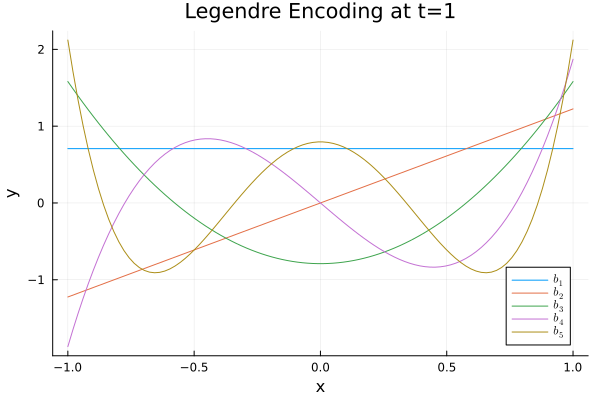

In [18]:
p

In [13]:
minimum(X_norm)

-1.0

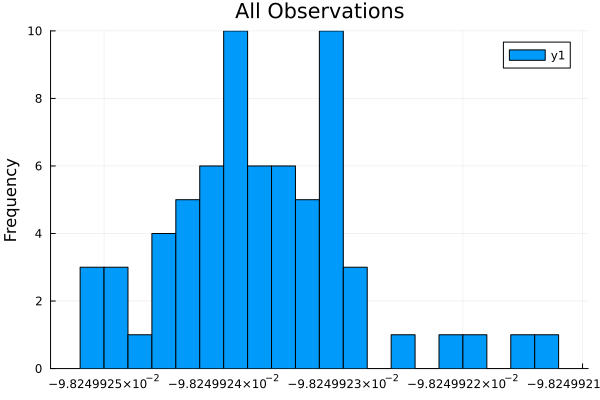

In [14]:
histogram(mean(X_norm; dims=1)[:]; bins=25, title="All Observations",ylabel="Frequency")


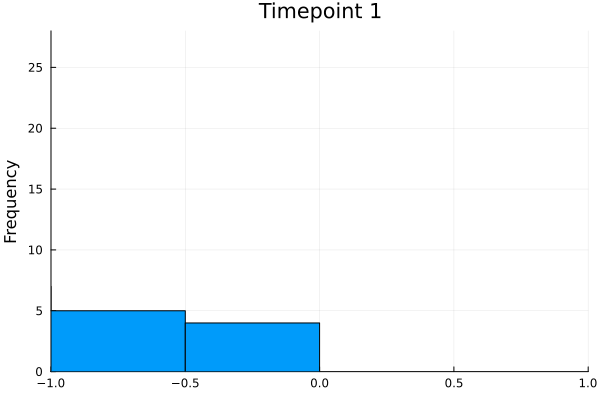

In [55]:
h = histogram(X_norm[1,:]; title="Timepoint 1",ylabel="Frequency", legend=:none, xlims=opts.encoding.range)


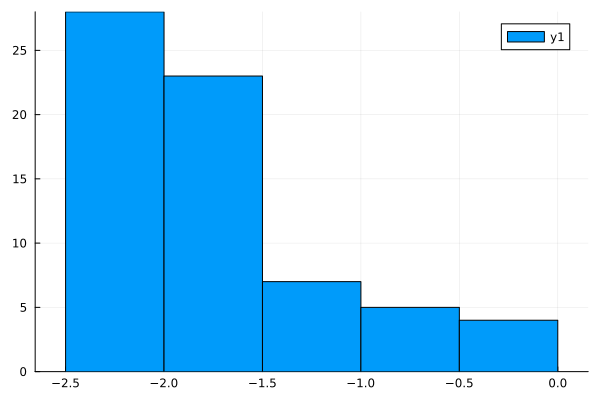

In [52]:
histogram(X_norm[1,:]; )


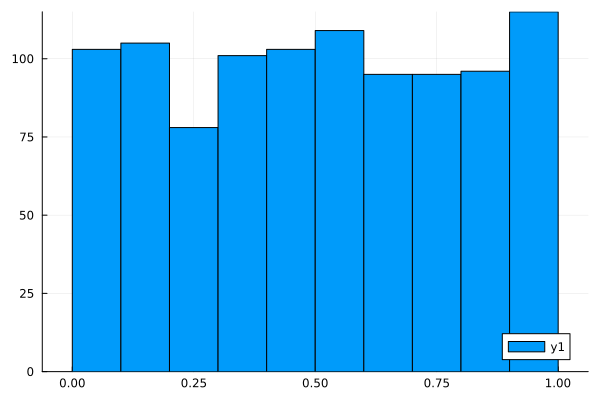

In [36]:
h = histogram(rand(1000))


# Setup Options

In [4]:
d = 5
chi_max = 25 # 
verbosity = 1
test_run = false
track_cost = false
encoding = :legendre_no_norm
projected_basis = false
encode_classes_separately = false
train_classes_separately = false
eta = 0.5 # 0.1
nsweeps = 5 # 3

opts = MPSOptions(; 
    nsweeps=nsweeps, # Number of Sweeps
    chi_max=chi_max,  #chi_max
    d=d, # physicl dimension
    eta=eta, # Learning Rate
    sigmoid_transform=false, # Whether to sigmoid transform the input
    loss_grad=:KLD, # KLD, MSE, or a weighted sum of each
    bbopt=:TSGO, # Gradient descent, GD + TSGO, or do conjugate gradient descent with Optim or OptimKit 
    encoding=encoding, # What the encoding is, can be a split basis
    projected_basis=projected_basis, # if one of the simple default option, this will pick the largest coeffs in the expansion
    encode_classes_separately=encode_classes_separately, 
    train_classes_separately=train_classes_separately, 
    aux_basis_dim=2, # For splitbases (Untested)
    verbosity=verbosity, # Verbosity of training during output (debugging)
    track_cost=track_cost, # even more debugging output
    log_level=5, # how much statistical information to give
    update_iters=1,
    exit_early=false, 
    init_rng=4567, 
    chi_init=4
)

MPSOptions(1, 5, 25, 0.5, 5, :legendre_no_norm, false, 2, 1.0e-10, 1, Float64, :KLD, :TSGO, false, (false, true), false, false, false, true, false, false, 4567, 4, 5, (0.0, 1.0))

In [5]:
W, info, test_states = fitMPS( ipd_X_train, ipd_y_train,ipd_X_test, ipd_y_test, opts);


Generating initial weight MPS with bond dimension χ_init = 4
        using random state 4567.
The test set couldn't be perfectly rescaled by the training set normalization, 37 additional rescaling operations had to be performed!
Initialising train states.
Initialising test states.
Using QuantumInspiredML.Options(1, 5, 25, 1.0e-10, 1, Float64, QuantumInspiredML.Loss_Grad_KLD(), CustomGD with TSGO, false, 0.5, (false, true), 5, 2, Basis(Legendre), false, false, false, true, false, false, 5, (0.0, 1.0), 4, 4567).update_iters iterations per update.
Training KL Div. 32.50959812395327 | Training acc. 0.31343283582089554 | Training MSE: 0.499999688643668.
Test KL Div. 32.06935071639959 | Testing acc. 0.36443148688046645 | Testing MSE: 0.4999999052984642.

Test conf: [265 248; 406 110].
Using optimiser CustomGD with the "TSGO" algorithm
Starting backward sweeep: [1/5]
Backward sweep finished.
Starting forward sweep: [1/5]
Finished sweep 1. Time for sweep: 29.36s
Training KL Div. -11.4428615994

In [ ]:
# MPSTime.print_opts(opts)
# summary = get_training_summary(W, test_states; print_stats=true);
# MPSTime.sweep_summary(info)


In [7]:
# TODO
# plot_basis

# Setup an Imputation

In [8]:
imp = init_imputation_problem(W, ipd_X_test, ipd_y_test; verbosity=1);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 67 training samples and 1029 testing samples.
Slicing MPS into individual states...
 - 2 class(es) were detected.
 - Time independent encoding - Legendre - detected.
 - d = 5, chi_max = 25
Re-encoding the training data to get the encoding arguments...

 Created 2 ImputationProblem struct(s) containing class-wise mps and test samples.


In [28]:
class = 1 
impute_sites = collect(5:15) 
instance_idx = 59 # which instance
invert_transform=true
method=:directMedian # or trajectories, or mode, mean etc...


:directMedian

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.313823 │
│ NN_MAE │ 0.307452 │
╰────────┴──────────╯


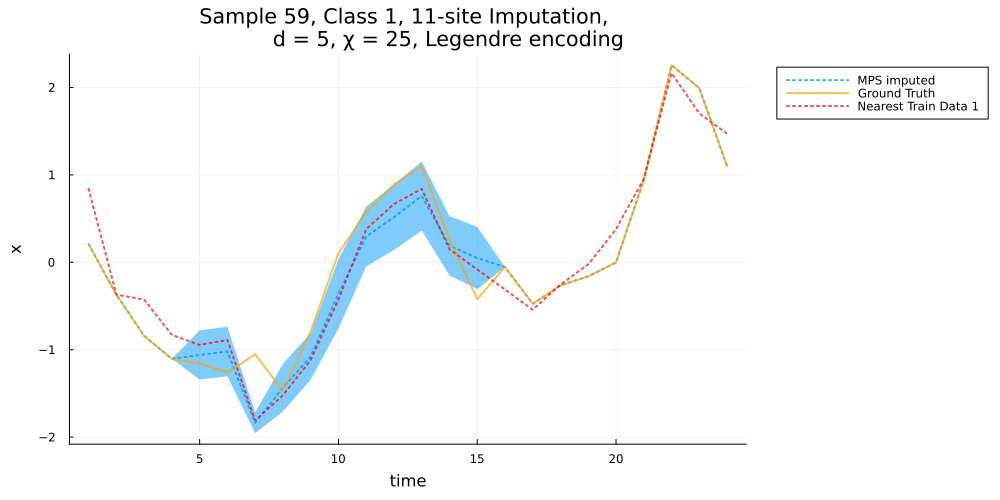

In [29]:

ts_ecg, pred_err, target, stats_ecg, p1_ns = MPS_impute(
    imp,
    class, 
    instance_idx, 
    impute_sites, 
    method; 
    NN_baseline=true, 
    plot_fits=true,
);

pretty_table(stats_ecg[1]; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.665422 │
╰────────┴──────────╯


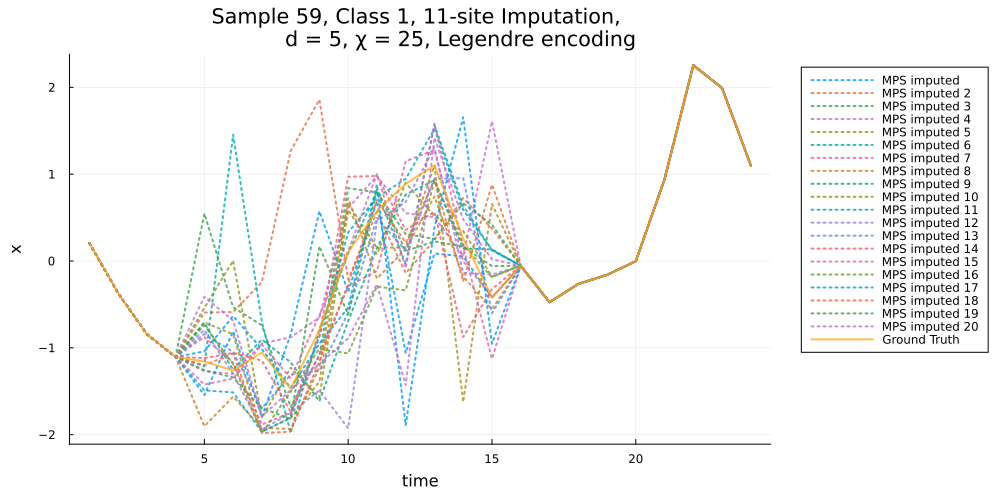

In [36]:
ts_ecg, pred_err, target, stats_ecg, p1_ns = MPS_impute(
    imp, 
    class, 
    instance_idx, 
    impute_sites, 
    :ITS; 
    NN_baseline=false, 
    plot_fits=true,
    num_trajectories=20
);

pretty_table(stats_ecg[1]; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)

In [41]:
impute_sites = collect(5:9) 

5-element Vector{Int64}:
 5
 6
 7
 8
 9

In [42]:
@time begin 
    cdfs, ts, pred_err, target = get_rdms(
    imp, 
    class, 
    instance_idx, 
    impute_sites
    );
    
end


  0.532731 seconds (5.10 M allocations: 365.694 MiB, 19.39% gc time)


(Any[[0.0, 0.00010323970498373784, 0.00020621148220480328, 0.00030891587885451303, 0.0004113534415621474, 0.0005135247163953244, 0.0006154302488603728, 0.0007170705839027058, 0.0008184462659071946, 0.0009195578386985395  …  0.9997340596981492, 0.9997633087238196, 0.999792632403928, 0.9998220308752565, 0.9998515042747564, 0.9998810527395486, 0.9999106764069237, 0.999940375414342, 0.9999701498994339, 1.0], [0.0, 0.00013694830084876923, 0.00027353294754458684, 0.000409754588942759, 0.0005456138732702688, 0.0006811114481261792, 0.0008162479604820355, 0.0009510240566822681, 0.0010854403824445947, 0.0012194975828604222  …  0.9997799401517643, 0.9998041366277463, 0.9998283964794287, 0.999852719826098, 0.9998771067871927, 0.9999015574823019, 0.9999260720311679, 0.9999506505536838, 0.9999752931698953, 1.0], [0.0, 0.0010693672913281787, 0.0021374012658486414, 0.003204103194387913, 0.0042694743468702345, 0.005333515992318039, 0.006396229398852442, 0.007457615833693707, 0.00851767656316174, 0.0095

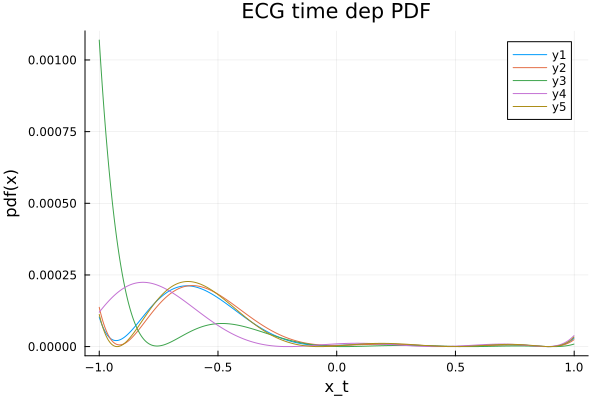

In [43]:
xvals = imp.x_guess_range.xvals[1:10:20000]

plot(xvals, diff(cdfs[1])[1:10:20000])
p = last([plot!(xvals, diff(cdfs[i])[1:10:20000]) for i in eachindex(cdfs)[2:end]])
ylabel!("pdf(x)")
xlabel!("x_t")
title!("ECG time dep PDF")